 ##                     <font color = red size =15>  POS Tagging Assignment Solution


#### <font color = VIOLET size = 5 > Problem Statement :</font>

- Need to handle POS Tagging for Unknown words by Modifying the Viterbi algorithm with at least two techniques. 


### <font color = BROWN size = 4> Solution Approach : </font>


1. Plain Vanila Viterbi Model
    - 1.1 Evaluating the tagging accuracy on validation set
    - 1.2 Identifying the incorrectly tagged words
    - 1.3 Identifying the unknown words tagging
    - 1.4 Evaluating the tagging accuracy on test set
        
2. Assigning frequently occuring Tag for unknown words with Viterbi Model
    - 2.1 Evaluating the validation set
    - 2.2 Identifying the incorrect Tagged words
    - 2.3 Evaluating the tagging accuracy on test set
    
3. Probability Technique(using transition probability for unknown words) with Viterbi Model
    - 3.1 Evaluating the validation set
    - 3.2 Identifying the incorrect Tagged words
    - 3.3 Evaluating the tagging accuracy on test set

4. Rule Based Technique with Viterbi Model
    - 4.1 Evaluating the validation set
    - 4.2 Identifying the incorrect Tagged words
    - 4.3 Evaluating the tagging accuracy on test set
    
5. Comparing accuracy for all the four models on the validation set

6. Comparision of incorrectly tagged by original POS tagger vs which are got corrected by your modifications


<font color = GOLDGREEN size = 5> Importing Required Packages & Libraries</font>

In [1]:
#Import statements:
import random
import requests
import numpy as np
import pandas as pd
import pprint, time
import seaborn as sns
import matplotlib.pyplot as plt
import nltk, re, pprint
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
# first few tagged sentences
print(nltk_data[:2])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [4]:
print("Length of the tagged data: ",len(nltk_data))

Length of the tagged data:  3914


In [5]:
# Splitting into train and test
random.seed(97)
train_set,validation_set = train_test_split(nltk_data,test_size=0.05,random_state=97)
print("Length of train set : ",len(train_set),'\n')
print("Length of validation set : ",len(validation_set),'\n')
print("The head of train set: \n",'\n',train_set[:5])

Length of train set :  3718 

Length of validation set :  196 

The head of train set: 
 
 [[('Mr.', 'NOUN'), ('Dahl', 'NOUN'), (',', '.'), ('a', 'DET'), ('registered', 'VERB'), ('representative', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('insurance', 'NOUN'), ('business', 'NOUN'), (',', '.'), ('said', 'VERB'), ('0', 'X'), ('he', 'PRON'), ('``', '.'), ('screwed', 'VERB'), ('up', 'PRT'), ("''", '.'), ('because', 'ADP'), ('he', 'PRON'), ('did', 'VERB'), ("n't", 'ADV'), ('realize', 'VERB'), ('0', 'X'), ('he', 'PRON'), ('was', 'VERB'), ('breaking', 'VERB'), ('securities', 'NOUN'), ('laws', 'NOUN'), ('.', '.')], [('Under', 'ADP'), ('the', 'DET'), ('measure', 'NOUN'), ('passed', 'VERB'), ('*', 'X'), ('yesterday', 'NOUN'), (',', '.'), ('the', 'DET'), ('minimum', 'ADJ'), ('wage', 'NOUN'), ('would', 'VERB'), ('rise', 'VERB'), ('to', 'PRT'), ('$', '.'), ('3.80', 'NUM'), ('*U*', 'X'), ('next', 'ADJ'), ('April', 'NOUN'), ('.', '.')], [('The', 'DET'), ('Illinois', 'NOUN'), ('Supreme', 'NOUN'), ('Cou

In [6]:
# Getting list of train set tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
print("Length of train tagged words: ",len(train_tagged_words))

# Getting list of validate set tagged words
validation_tagged_words1 = [tup for sent in validation_set for tup in sent]
print("Length of validation_set tagged words: ",len(validation_tagged_words1))

Length of train tagged words:  95565
Length of validation_set tagged words:  5111


In [7]:
# Getting tokens of train set word corpus:
tokens = [pair[0] for pair in train_tagged_words]
print("The head of the tokens: ",tokens[:10])

The head of the tokens:  ['Mr.', 'Dahl', ',', 'a', 'registered', 'representative', 'in', 'the', 'insurance', 'business']


In [8]:
# vocabulary of taken corpus:
V = set(tokens)
print("The length of the unique vocabulary: ",len(V),"words")

The length of the unique vocabulary:  12064 words


In [9]:
# number of tags
Tags = [pair[1] for pair in train_tagged_words]
Unique_Tags=set(Tags)
print("The length of the unique tags in the corpus: ",len(Unique_Tags),'\n')
print("The unique tags tagged for the corpus: \n",'\n',Unique_Tags)

The length of the unique tags in the corpus:  12 

The unique tags tagged for the corpus: 
 
 {'PRON', 'CONJ', 'PRT', 'ADV', 'NOUN', 'X', 'ADJ', 'NUM', 'DET', 'VERB', '.', 'ADP'}


In [10]:
#Frequency of tags in the data set and most frequent tag
from collections import Counter
tag_counts = Counter(Tags)
tag_counts
# Most common tag
print("Most common tags: ",tag_counts.most_common(5))

Most common tags:  [('NOUN', 27321), ('VERB', 12902), ('.', 11131), ('ADP', 9331), ('DET', 8245)]


The most occured tag is: **Noun**

<font color = BROWN size = 5>  POS Tagging Algorithm - HMM </font>

We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word. 

In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).


P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e. 

P(w/t) = count(w, t) / count(t). 


The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).


Given the penn treebank tagged dataset, we can compute the two terms P(w/t) and P(t) and store them in two large matrices. The matrix of P(w/t) will be sparse, since each word will not be seen with most tags ever, and those terms will thus be zero. 


<font color = Blue size = 5> Computing Transition Probabilities </font>

In [11]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    
    # Calculate No.of times tag t1 appears
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    
    # Calculate No.of times t1 is followed by tag t2
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

<font color = Blue size = 5> Computing Emission Probabilities </font>

In [12]:
# computing P(w/t) and storing in T x V matrix
t = len(Unique_Tags)
v = len(V)
w_given_t = np.zeros((t, v))

In [13]:
#  Method to compute word given tag is: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    
    # Calculate No.of times tag t appears
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    
    # Calculate No.of times word w has been tagged as tag t
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [14]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(Unique_Tags), len(Unique_Tags)), dtype='float32')
for i, t1 in enumerate(list(Unique_Tags)):
    for j, t2 in enumerate(list(Unique_Tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
print("t x t transition matrix: ",'\n',tags_matrix)       

t x t transition matrix:  
 [[8.03366490e-03 5.35577675e-03 1.22417752e-02 3.48125473e-02
  2.08110169e-01 9.29609761e-02 7.30680972e-02 7.26855407e-03
  9.56388656e-03 4.86227989e-01 3.97857688e-02 2.25707721e-02]
 [5.93692027e-02 4.63821896e-04 5.10204071e-03 5.56586273e-02
  3.46938789e-01 7.88497180e-03 1.17810763e-01 4.12801467e-02
  1.20129868e-01 1.56771794e-01 3.52504626e-02 5.33395186e-02]
 [1.76355317e-02 2.28608749e-03 1.95950363e-03 1.01241022e-02
  2.47550622e-01 1.33899413e-02 8.52384046e-02 5.78053556e-02
  9.79751796e-02 4.01698232e-01 4.31090780e-02 2.12279558e-02]
 [1.52267460e-02 7.28235673e-03 1.45647135e-02 8.04369450e-02
  3.14465426e-02 2.35021524e-02 1.29758358e-01 3.11155245e-02
  6.85203597e-02 3.45249921e-01 1.35054618e-01 1.17841773e-01]
 [4.72164247e-03 4.29340079e-02 4.40320633e-02 1.71662830e-02
  2.62911320e-01 2.91350968e-02 1.22250281e-02 9.69949830e-03
  1.29204644e-02 1.47542179e-01 2.40401164e-01 1.76311269e-01]
 [5.65438382e-02 1.00063533e-02 1.845

In [15]:
# convert the matrix to a dataframe(tags_df) for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(Unique_Tags), index=list(Unique_Tags))
tags_df

,PRON,CONJ,PRT,ADV,NOUN,X,ADJ,NUM,DET,VERB,.,ADP
PRON,0.008034,0.005356,0.012242,0.034813,0.208110,0.092961,0.073068,0.007269,0.009564,0.486228,0.039786,0.022571
CONJ,0.059369,0.000464,0.005102,0.055659,0.346939,0.007885,0.117811,0.041280,0.120130,0.156772,0.035250,0.053340
PRT,0.017636,0.002286,0.001960,0.010124,0.247551,0.013390,0.085238,0.057805,0.097975,0.401698,0.043109,0.021228
ADV,0.015227,0.007282,0.014565,0.080437,0.031447,0.023502,0.129758,0.031116,0.068520,0.345250,0.135055,0.117842
NOUN,0.004722,0.042934,0.044032,0.017166,0.262911,0.029135,0.012225,0.009699,0.012920,0.147542,0.240401,0.176311
X,0.056544,0.010006,0.184562,0.026207,0.062421,0.074968,0.016836,0.002859,0.054320,0.203304,0.164708,0.143266
ADJ,0.000656,0.016574,0.010174,0.004759,0.699212,0.020676,0.067279,0.021004,0.004595,0.012471,0.064818,0.077781
NUM,0.001474,0.013856,0.026828,0.002653,0.353184,0.209611,0.033903,0.184257,0.003243,0.017689,0.118809,0.034493
DET,0.003396,0.000485,0.000121,0.012614,0.636386,0.045846,0.206549,0.022317,0.005579,0.039418,0.017829,0.009460
VERB,0.035653,0.005348,0.031623,0.081305,0.110448,0.218183,0.064564,0.022787,0.133855,0.169509,0.035111,0.091614


In [16]:
tags_df.loc['.', :]

PRON    0.066571
CONJ    0.058126
PRT     0.002515
ADV     0.052556
NOUN    0.221903
X       0.027131
ADJ     0.044111
NUM     0.081664
DET     0.173390
VERB    0.088581
.       0.093073
ADP     0.090288
Name: ., dtype: float32

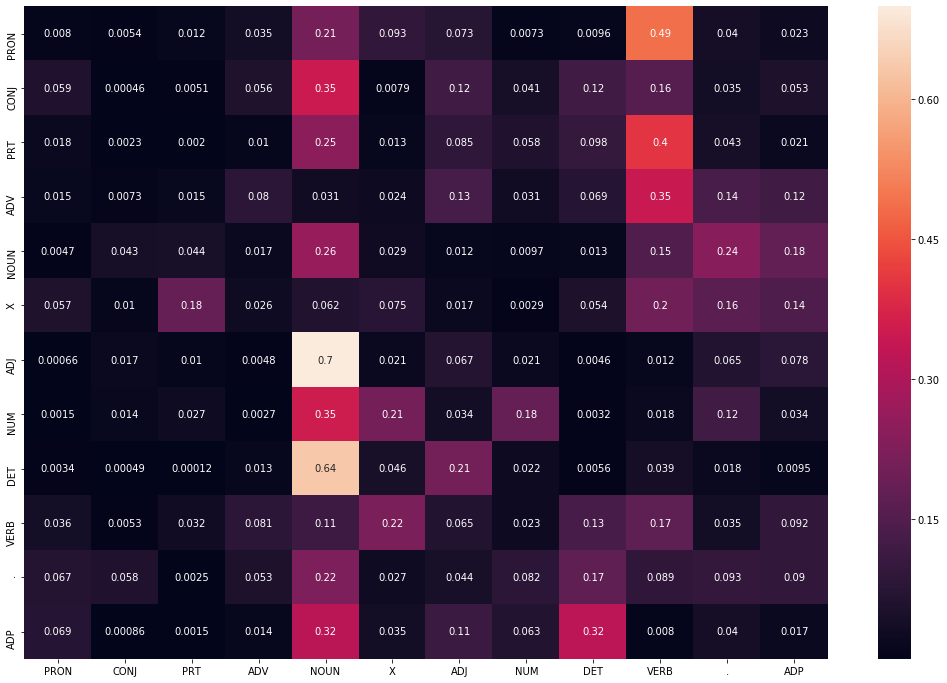

In [17]:
# Heatmap of tags matrix as below:
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df,annot=True)
plt.show()

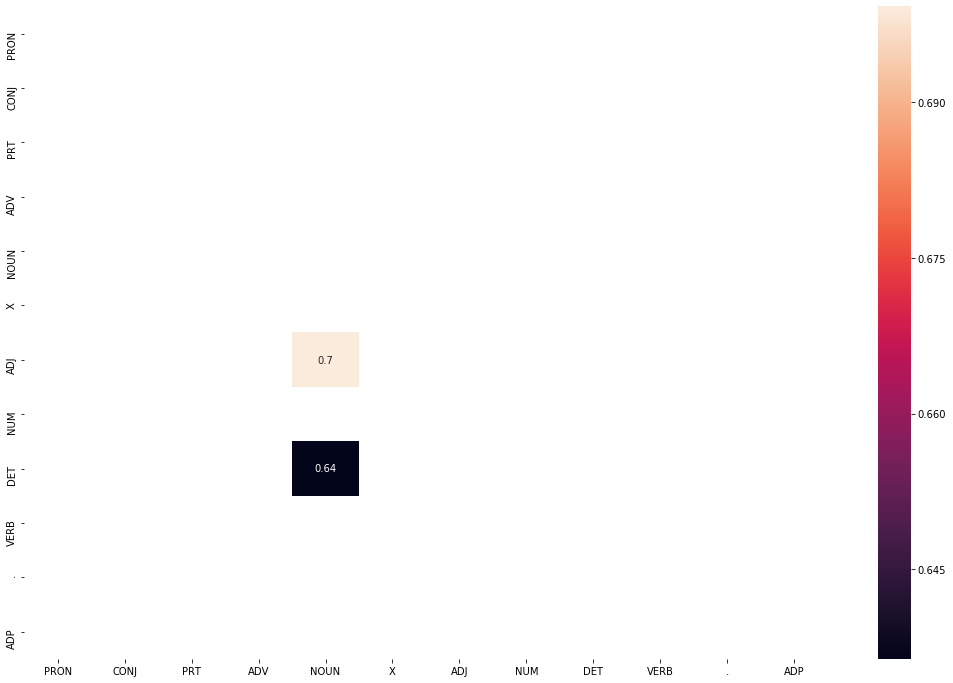

In [18]:
# frequent tags Heatmap:
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent,annot=True)
plt.show()

<font color = Brown size = 3> Tagging using vanila Viterbi algorithm and then we will modify it based on Lexicon, Rule based and Probabilistic methods for handling unknown words. </font>

<font color= Blue size = 5>Step 1. Initially Building the vanilla Viterbi based POS tagger </font>

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

Steps As part of Plain Vanila Viterbi Model:
    - 1.1 Evaluating the tagging accuracy on validation set
    - 1.2 Identifying the incorrectly tagged words
    - 1.3 Identifying the unknown words tagging
    - 1.4 Evaluating the tagging accuracy on test set

In [19]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            
            if key == 0:
                transition_p = tags_df.loc['.', tag]
                
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
        
    return list(zip(words, state))



<font color= Brown size = 5> 1.1 Evaluating the tagging accuracy on validation set </font>

In [20]:
# list of tagged words for the validation dataset
validation_run_base = [tup for sent in validation_set for tup in sent]

# list of untagged words
validation_tagged_words = [tup[0] for sent in validation_set for tup in sent]

In [21]:
print("Length of validation tagged words: ",len(validation_tagged_words))

Length of validation tagged words:  5111


In [22]:
# tagging the validation sentences
start = time.time()
tagged_seq = Viterbi(validation_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference,'\n')
print("First 20 Tagged Sequence:\n",'\n',tagged_seq[:20])

Time taken in seconds:  1129.9221768379211 

First 20 Tagged Sequence:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('as', 'ADP'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN')]


#### Accuracy of validation set on vanila viterbi

In [23]:
#Accuracy
check = [i for i, j in zip(tagged_seq, validation_run_base) if i == j]
accuracy = len(check)/len(tagged_seq)
print("Validation set accuracy on vanila viterbi model: ",accuracy)

Validation set accuracy on vanila viterbi model:  0.9053022891801996


<font color= Brown size = 5> 1.2  Identifying incorrect tagged cases </font>

In [24]:
incorrect_tagged_cases = [[validation_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, validation_run_base)) if j[0]!=j[1]]
print("Incorrect tagged cases: \n",'\n',incorrect_tagged_cases)

Incorrect tagged cases: 
 
 [[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))], [('the', 'DET'), (('genie', 'PRON'), ('genie', 'NOUN'))], [('A', 'DET'), (('licensing', 'PRON'), ('licensing', 'NOUN'))], [('lawsuit', 'NOUN'), (('challenging', 'PRON'), ('challenging', 'VERB'))], [('to', 'PRT'), (('contest', 'PRON'), ('contest', 'VERB'))], [('Health', 'NOUN'), (('Review', 'PRON'), ('Review', 'NOUN'))], [('the', 'DET'), (('band-wagon', 'PRON'), ('band-wagon', 'ADJ'))], [('days', 'NOUN'), (('picks', 'PRON'), ('picks', 'VERB'))], [('picks', 'VERB'), (('up', 'ADV'), ('up', 'PRT'))], [('new', 'ADJ'), (('impetus', 'PRON'), ('impetus', 'NOUN'))], [('the', 'DET'), (('statue', 'PRON'), ('statue', 'NOUN'))], [('Thomas', 'NOUN'), (('Jefferson', 'PRON'), ('Jefferson', 'NOUN'))], [('Jefferson', 'NOUN'), (('dissolves', 'PRON'), ('dissolves', 'VERB'))], [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))], [('.', '.'), (('Video', 'PRON'), ('Video', 'NOUN'))], [('Video', 'NOUN'), (('Tip', 'PRON'),

In [25]:
print("length of incorrect tagged words using vanila viterbi: ",len(incorrect_tagged_cases))

length of incorrect tagged words using vanila viterbi:  484


<font color= Brown size = 5>  1.3 Identifying unknown words in validation set </font>

In [26]:
# Check if validation data set has unknown words
words_train_set = [pair[0] for pair in train_tagged_words]
# Vocablary of training dataset
vocab_train_set = set(words_train_set)
print("Length of vocabulary for train set: ",len(vocab_train_set))

Length of vocabulary for train set:  12064


In [27]:
words_validation_set = [pair[0] for pair in validation_tagged_words1]
# vocablary of validation dataset
vocab_validation_set = set(words_validation_set)
print("Length of vocabulary for validation set: ",len(vocab_validation_set))

Length of vocabulary for validation set:  1951


In [28]:
unknown_words = np.setdiff1d(words_validation_set,words_train_set)
print("Length of unknown words in validation set: ",len(unknown_words))

Length of unknown words in validation set:  344


<font color= Blue size = 5> Inference:</font>
    - Computed accuracy on vanila viterbi model is: 90.53
    - There are 484 incorrect tagged words and 344 unknown words.

<font color= Brown size = 5> 1.4  Evaluating tagging accuracy on test set </font>

In [29]:
# The sentences given in the testfile are stored in a variable
sentences="Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."

# Tokenizing the sentences
test_words = word_tokenize(sentences)


# Tagging using nltk_pos_tag
test_run_base= nltk.pos_tag(test_words,tagset='universal')

# Validating on the test set
start = time.time()
tagged_seq_test=Viterbi(test_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print("First 20 Tagged Sequence:\n",'\n',tagged_seq[:20])


Time taken in seconds:  36.77663040161133
First 20 Tagged Sequence:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('as', 'ADP'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN')]


In [30]:
# accuracy
check = [i for i, j in zip(tagged_seq_test, test_run_base) if i == j]
accuracy_t = len(check)/len(tagged_seq_test)
print("Test set accuracy on vanila viterbi model: ",accuracy_t)

Test set accuracy on vanila viterbi model:  0.7569060773480663


In [31]:
tempResults = pd.DataFrame({'Method':['VanilaViterbi'], 'Validation_Accuracy': [accuracy],'Test_Accuracy': [accuracy_t],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases) })
tempResults

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,VanilaViterbi,0.905302,0.756906,484


### Solve the problem of unknown words: 

- Handling unknown words can be done using : Lexicon, Probabilistic and Rule based techniques. 


<font color= Blue size = 5> **Approach 1**: Lexicon </font>
- To start with we will start with Lexicon (Tagging by assigning most frequently occuring tag to unknown words)

<font color=Brown size =5> Step 2. Assigning **frequently** occuring tag for **unknown tags** </font>

In [32]:
#This function extracts the most frequently occuring tag in dataset and assigns the unknown word with that tag.
#This function takes the train dataset as input
def frequency_based_tagging(train_bag=train_tagged_words):
    #Extract tags
    tags = [tag for (word, tag) in train_bag]
    
    #Find most frequently occuring tag and return it to tag unknown word.
    predicted_tag = nltk.FreqDist(tags).max()
        
    return predicted_tag

In [33]:
#modified Viterbi by tagging unknown words with most frequently tagged tag.
def Viterbi_freq_tag(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = T[p.index(pmax)]    
        
        if(pmax==0):
            state_max = frequency_based_tagging() # assign frequency based  tagging
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

<font color = Brown size = 5> 2.1 Evaluating tagging accuracy on validation set </font>

In [34]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi_freq_tag(validation_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print("First 20 Tagged Sequence:\n",'\n',tagged_seq[:20],'\n')

# accuracy
check = [i for i, j in zip(tagged_seq, validation_run_base) if i == j]
accuracy = len(check)/len(tagged_seq)
print("Validation set accuracy on modified viterbi model(Frequently occured tag): ",accuracy)

Time taken in seconds:  1228.3423726558685
First 20 Tagged Sequence:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('as', 'ADP'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN')] 

Validation set accuracy on modified viterbi model(Frequently occured tag):  0.9389551946781451


<font color = Brown size = 5> 2.2 Identifying incorrect tagged cases </font>

In [35]:
incorrect_tagged_cases = [[validation_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, validation_run_base)) if j[0]!=j[1]]
print("List of incorrect tagged cases: \n \n",incorrect_tagged_cases)

List of incorrect tagged cases: 
 
 [[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))], [('genie', 'NOUN'), (('back', 'PRT'), ('back', 'ADV'))], [('lawsuit', 'NOUN'), (('challenging', 'NOUN'), ('challenging', 'VERB'))], [('to', 'PRT'), (('contest', 'NOUN'), ('contest', 'VERB'))], [('the', 'DET'), (('band-wagon', 'NOUN'), ('band-wagon', 'ADJ'))], [('days', 'NOUN'), (('picks', 'NOUN'), ('picks', 'VERB'))], [('Jefferson', 'NOUN'), (('dissolves', 'NOUN'), ('dissolves', 'VERB'))], [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))], [('his', 'PRON'), (('finest', 'NOUN'), ('finest', 'ADJ'))], [('Moody', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))], [('move', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))], [('and', 'CONJ'), (('signal', 'NOUN'), ('signal', 'VERB'))], [('To', 'PRT'), (('further', 'ADJ'), ('further', 'ADV'))], [('further', 'ADV'), (('load', 'NOUN'), ('load', 'VERB'))], [('Lane', 'NOUN'), (('dreamed', 'NOUN'), ('dreamed', 'VERB'))], [('highly', 'ADV'), (('improbable', 'NOUN')

In [36]:
print("Length of incorrect tagged words using modified viterbi by tagging with most frequently tagged tag: ",len(incorrect_tagged_cases))

Length of incorrect tagged words using modified viterbi by tagging with most frequently tagged tag:  312


<font color = Brown size = 5> 2.3  Evaluating tagging accuracy on test set</font>

In [37]:
tagged_seq_test = Viterbi_freq_tag(test_words)
# accuracy
check = [i for i, j in zip(tagged_seq_test, test_run_base) if i == j]
accuracy_t = len(check)/len(tagged_seq_test)
print("Test set accuracy on modified viterbi model(Frequently occured tag): ",accuracy_t)

Test set accuracy on modified viterbi model(Frequently occured tag):  0.9116022099447514


In [38]:
results = pd.DataFrame({'Method':['Modified Viterbi (Frequently tagged tag)'], 'Validation_Accuracy': [accuracy],'Test_Accuracy': [accuracy_t],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases) })
results = pd.concat([tempResults,results])
results = results[['Method', 'Validation_Accuracy', 'Test_Accuracy','Number of Incorrect Tagged Words']]
results

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,VanilaViterbi,0.905302,0.756906,484
0,Modified Viterbi (Frequently tagged tag),0.938955,0.911602,312


Modified viterbi(frequently tagged tag) has performed better than plain viterbi

### Sample cases to identify the difference are listed at the end

<font color = Blue size = 5> Approach 2: Probabilistic method: </font>

- If the word-tag pair is not found in the dataset, Vanilla Viterbi will yield the emission probability as ZERO

- By considering only transition probability, we can smoothe out these ZERO values 

<font color = Brown size = 5> Step: 3 Probabilistic Method </font>

In [39]:
# Modified Viterbi Heuristic- By considering only transition probability
def Viterbi_Transition(words, train_bag = train_tagged_words):
    state = []
    
    # Take the list of unique tags present in the corpus
    T = sorted(list(set([pair[1] for pair in train_bag])))
    V = [i[0] for i in train_bag]
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        
        for tag in T:
            if key == 0: #first word has key=0
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            
            # modification to the original vanilla viterbi algorithm. 
            # Vocab contains the list of unique words in training dataset
            if word not in V: 
                state_probability = transition_p
            else:
                state_probability = emission_p * transition_p
                
            p.append(state_probability)
            
        pmax = max(p)
        
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
        
    return list(zip(words, state))

<font color = Borwn size = 5> 3.1 Evaluating tagging accuracy on validation set </font>

In [40]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi_Transition(validation_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print("First 20 Tagged Sequence:\n",'\n',tagged_seq[:20])


# accuracy
check = [i for i, j in zip(tagged_seq, validation_run_base) if i == j]
accuracy = len(check)/len(tagged_seq)
print("Validation set accuracy on modified viterbi model(probabilistic): ",accuracy)

Time taken in seconds:  1166.097615480423
First 20 Tagged Sequence:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('as', 'ADP'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN')]
Validation set accuracy on modified viterbi model(probabilistic):  0.9391508511054588


<font color = Borwn size = 5>  3.2 Identifying incorrect tagged cases </font>

In [41]:
incorrect_tagged_cases = [[validation_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, validation_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases

[[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))],
 [('genie', 'NOUN'), (('back', 'PRT'), ('back', 'ADV'))],
 [('lawsuit', 'NOUN'), (('challenging', 'NOUN'), ('challenging', 'VERB'))],
 [('the', 'DET'), (('band-wagon', 'NOUN'), ('band-wagon', 'ADJ'))],
 [('days', 'NOUN'), (('picks', 'NOUN'), ('picks', 'VERB'))],
 [('Jefferson', 'NOUN'), (('dissolves', 'NOUN'), ('dissolves', 'VERB'))],
 [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))],
 [('his', 'PRON'), (('finest', 'VERB'), ('finest', 'ADJ'))],
 [('Moody', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('move', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('its', 'PRON'), (('borrowings', 'VERB'), ('borrowings', 'NOUN'))],
 [('and', 'CONJ'), (('signal', 'NOUN'), ('signal', 'VERB'))],
 [('To', 'PRT'), (('further', 'ADJ'), ('further', 'ADV'))],
 [('further', 'ADV'), (('load', 'NOUN'), ('load', 'VERB'))],
 [('Lane', 'NOUN'), (('dreamed', 'NOUN'), ('dreamed', 'VERB'))],
 [('highly', 'ADV'), (('improbable', 'VERB'), ('improbabl

In [42]:
print("length of incorrect tagged words using modified viterbi model(probabilistic): ",len(incorrect_tagged_cases))

length of incorrect tagged words using modified viterbi model(probabilistic):  311


<font color = Borwn size = 5>  3.3  Evaluating tagging accuracy on test set </font>

In [43]:
tagged_seq_test = Viterbi_Transition(test_words)
#Testset accuracy
check = [i for i, j in zip(tagged_seq_test, test_run_base) if i == j]
accuracy_t = len(check)/len(tagged_seq_test)
print("Test set accuracy on modified viterbi model(probabilistic): ",accuracy_t)

Test set accuracy on modified viterbi model(probabilistic):  0.861878453038674


In [44]:
#combined results of previous modified viterbi along with Probabilistic model:
tempResults = pd.DataFrame({'Method':['Modified Viterbi (Probabilistic)'], 'Validation_Accuracy': [accuracy],'Test_Accuracy': [accuracy_t],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases) })
results = pd.concat([results, tempResults])
results = results[['Method', 'Validation_Accuracy', 'Test_Accuracy','Number of Incorrect Tagged Words']]
results

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,VanilaViterbi,0.905302,0.756906,484
0,Modified Viterbi (Frequently tagged tag),0.938955,0.911602,312
0,Modified Viterbi (Probabilistic),0.939151,0.861878,311


Probabilistic model has performed better than plain viterbi 

<font color = Blue size = 5>  Approach 3:  Rule Based  </font>

- Rule Based technique for handling the unknown words, by modified Viterbi Algorithm. 
- If the state of the word is zero then use rule based engine, to tag the vocabulary to the words.
- Defining the rules using regular expressions to tag.

<font color = Brown size=5 >  4. Rule Based Viterbi Heuristics: </font>

In [45]:
# Defining the patterns using regular expression and tag based on these rules
patterns =[
    (r'^([0-9]|[aA-zZ])+\-([0-9]|[aA-zZ])*$','ADJ'), # words such as '10-lap','30-day','York-based'
    (r'.*able$', 'ADJ'),                     # words ending with 'able' such as 'questionable'
    (r'.*ful$', 'ADJ'),                      # words ending with 'ful' such as 'useful'
    (r'.*ous$', 'ADJ'),                      # words ending with 'ous' such as 'Previous'
    
    (r'.*\'s$', 'NOUN'),                     # possessive nouns
    (r'.*s$', 'NOUN'),                       # plural nouns
    (r'^[aA-zZ].*[0-9]+','NOUN'),            # Alpha Numeric such as Door Number, Street Number etc
    (r'.*ers$', 'NOUN'),                     # words ending with 'ers' such as 'filters','workers'
    (r'.*ment$', 'NOUN'),                    # words ending with 'ment' such as 'reinvestment' 
    (r'.*town$', 'NOUN'),                    # words ending with 'town' such as 'town','downtown'  
    (r'.*ness$', 'NOUN'),                    # words ending with 'ness' such as 'sluggishness' 
    (r'^[A-Z]+([a-z]{1,2})?\.?$','NOUN'),    # words such as 'Nov.','Mr.','Inc.'
    
    (r'[aA-zZ]+(ed|ing|es)$', 'VERB'),       # words ending with 'ed' or 'ing' or 'es'    
    (r'.*ly$', 'ADV'),                       # words ending with 'ly'
    
    (r'^[0-9]+(.[0-9]+)?$', 'NUM'),          # cardinal numbers such as 61, 1956, 9.8, 8.45, 352.7        
    (r'^(0|([*|-|$].*))','X'),               # words such as '*', '0', *-1', '*T*-1', '*ICH*-1', '*?*'   
    
    (r'(The|the|A|a|An|an|That|that|This|this|Those|those|These|these)$', 'DET'), # determinants     
    (r'.*', 'NOUN')  
    ]
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [46]:
#modified Viterbi to include rule based tagger in it
def Viterbi_rule_based(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        
        # modified algorithm         
        
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

<font color = Brown size=5 > 4.1 Evaluating tagging accuracy on validation set </font>

In [47]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi_rule_based(validation_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print("First 20 Tagged Sequence:\n",'\n',tagged_seq[:20],'\n')

# accuracy
check = [i for i, j in zip(tagged_seq, validation_run_base) if i == j]
accuracy = len(check)/len(tagged_seq)
print("Validation set accuracy on modified viterbi model(Rule Based using Regex): ",accuracy)


Time taken in seconds:  1138.8413078784943
First 20 Tagged Sequence:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('as', 'ADP'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN')] 

Validation set accuracy on modified viterbi model(Rule Based using Regex):  0.9585208374095089


<font color = Brown size=5 > 4.2 Identifying incorrect words </font>

In [48]:
incorrect_tagged_cases = [[validation_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, validation_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases

[[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))],
 [('genie', 'NOUN'), (('back', 'PRT'), ('back', 'ADV'))],
 [('A', 'DET'), (('licensing', 'VERB'), ('licensing', 'NOUN'))],
 [('to', 'PRT'), (('contest', 'NOUN'), ('contest', 'VERB'))],
 [('days', 'NOUN'), (('picks', 'NOUN'), ('picks', 'VERB'))],
 [('Jefferson', 'NOUN'), (('dissolves', 'NOUN'), ('dissolves', 'VERB'))],
 [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))],
 [('his', 'PRON'), (('finest', 'NOUN'), ('finest', 'ADJ'))],
 [('Moody', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('move', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('and', 'CONJ'), (('signal', 'NOUN'), ('signal', 'VERB'))],
 [('To', 'PRT'), (('further', 'ADJ'), ('further', 'ADV'))],
 [('further', 'ADV'), (('load', 'NOUN'), ('load', 'VERB'))],
 [('dreamed', 'VERB'), (('up', 'ADV'), ('up', 'PRT'))],
 [('.', '.'), (('Weatherly', 'ADV'), ('Weatherly', 'NOUN'))],
 [('*-1', 'X'), (('marketing', 'NOUN'), ('marketing', 'VERB'))],
 [('network', 'NOUN'), (('

In [49]:
print("length of incorrect tagged words using modified viterbi model (Rule Based using Regex) ",len(incorrect_tagged_cases))

length of incorrect tagged words using modified viterbi model(Rule Based using Regex)  212


<font color = Brown size=5 > 4.3 Evaluating tagging accuracy on test set</font>

In [50]:
tagged_seq_test = Viterbi_rule_based(test_words)
# accuracy
check = [i for i, j in zip(tagged_seq_test, test_run_base) if i == j]
accuracy_t = len(check)/len(tagged_seq_test)
print("Test set accuracy on modified viterbi model(Rule Based using Regex): ",accuracy_t)

Test set accuracy on modified viterbi model(Rule Based using Regex):  0.9337016574585635


Modified viterbi(rule based has performed better than all the models built till now

<font color = Blue size=5 >  5. Comparision of tagging accuracies w.r.to modifications in vanilla Viterbi algorithm: </font>

In [51]:
tempResults = pd.DataFrame({'Method':['Modified Viterbi (Rule Based using Regex)'], 'Validation_Accuracy': [accuracy],'Test_Accuracy': [accuracy_t],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases) })
results = pd.concat([results, tempResults])
results = results[['Method', 'Validation_Accuracy', 'Test_Accuracy','Number of Incorrect Tagged Words']]
results

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,VanilaViterbi,0.905302,0.756906,484
0,Modified Viterbi (Frequently tagged tag),0.938955,0.911602,312
0,Modified Viterbi (Probabilistic),0.939151,0.861878,311
0,Modified Viterbi (Rule Based using Regex),0.958521,0.933702,212


<font color = Brown size = 5> Inference: </font>
- The accuracy has been increased with modified algorithm (rule based algorithm ) and has given much accuracy  from 94% to 96% and also the incorrectly tagged words are also less when compared to other models from 311 words to 212 words

<font color = Blue size=5 > 6. Cases were incorrectly tagged by original POS tagger and got corrected by your modifications</font>

In [52]:
# vocablary of validation dataset
vocab_test_set = set(test_words)
print("The length of the vocabulary for given test file : ",len(vocab_test_set))

The length of the vocabulary for given test file :  115


In [53]:
# Identifying the unknown words in the test file
unknown_words = np.setdiff1d(test_words,words_train_set)
print("Number of unknown words in the test file: ",len(unknown_words))

Number of unknown words in the test file:  28


In [54]:
print("The unknown words: ",unknown_words)

The unknown words:  ['2011' '2013' '2015' '2018' '21st' 'Android' 'Cup' 'FIFA' 'Google'
 'ICESAT-2' 'NASA' 'OS' 'Satellite' 'Twitter' 'arriving' 'contested'
 'domineering' 'firehose' 'interact' 'invited' 'messages' 'online'
 'personality' 'smartphones' 'tournament' 'trips' 'tweets' 'worldwide']


In [55]:
# Finding the tag sequence for the unknown words using vanila viterbi
tagged_seq = Viterbi(unknown_words)
print("The tagged sequence of unknown words using vanila viterbi model: \n \n",tagged_seq)

The tagged sequence of unknown words using vanila viterbi model: 
 
 [('2011', 'PRON'), ('2013', 'PRON'), ('2015', 'PRON'), ('2018', 'PRON'), ('21st', 'PRON'), ('Android', 'PRON'), ('Cup', 'PRON'), ('FIFA', 'PRON'), ('Google', 'PRON'), ('ICESAT-2', 'PRON'), ('NASA', 'PRON'), ('OS', 'PRON'), ('Satellite', 'PRON'), ('Twitter', 'PRON'), ('arriving', 'PRON'), ('contested', 'PRON'), ('domineering', 'PRON'), ('firehose', 'PRON'), ('interact', 'PRON'), ('invited', 'PRON'), ('messages', 'PRON'), ('online', 'PRON'), ('personality', 'PRON'), ('smartphones', 'PRON'), ('tournament', 'PRON'), ('trips', 'PRON'), ('tweets', 'PRON'), ('worldwide', 'PRON')]


In [56]:
# Finding the tag sequence for the unknown words using modified viterbi(frequently occured tag)
tagged_seq = Viterbi_freq_tag(unknown_words)
print("The tagged sequence of unknown words using modified viterbi(frequently occured tag): \n \n",tagged_seq)

The tagged sequence of unknown words using modified viterbi(frequently occured tag): 
 
 [('2011', 'NOUN'), ('2013', 'NOUN'), ('2015', 'NOUN'), ('2018', 'NOUN'), ('21st', 'NOUN'), ('Android', 'NOUN'), ('Cup', 'NOUN'), ('FIFA', 'NOUN'), ('Google', 'NOUN'), ('ICESAT-2', 'NOUN'), ('NASA', 'NOUN'), ('OS', 'NOUN'), ('Satellite', 'NOUN'), ('Twitter', 'NOUN'), ('arriving', 'NOUN'), ('contested', 'NOUN'), ('domineering', 'NOUN'), ('firehose', 'NOUN'), ('interact', 'NOUN'), ('invited', 'NOUN'), ('messages', 'NOUN'), ('online', 'NOUN'), ('personality', 'NOUN'), ('smartphones', 'NOUN'), ('tournament', 'NOUN'), ('trips', 'NOUN'), ('tweets', 'NOUN'), ('worldwide', 'NOUN')]


In [57]:
# Finding the tag sequence for the unknown words using modified viterbi(transition)
tagged_seq = Viterbi_Transition(unknown_words)
print("The tagged sequence of unknown words using modified viterbi(transition): \n \n",tagged_seq)

The tagged sequence of unknown words using modified viterbi(transition): 
 
 [('2011', 'NOUN'), ('2013', 'NOUN'), ('2015', 'NOUN'), ('2018', 'NOUN'), ('21st', 'NOUN'), ('Android', 'NOUN'), ('Cup', 'NOUN'), ('FIFA', 'NOUN'), ('Google', 'NOUN'), ('ICESAT-2', 'NOUN'), ('NASA', 'NOUN'), ('OS', 'NOUN'), ('Satellite', 'NOUN'), ('Twitter', 'NOUN'), ('arriving', 'NOUN'), ('contested', 'NOUN'), ('domineering', 'NOUN'), ('firehose', 'NOUN'), ('interact', 'NOUN'), ('invited', 'NOUN'), ('messages', 'NOUN'), ('online', 'NOUN'), ('personality', 'NOUN'), ('smartphones', 'NOUN'), ('tournament', 'NOUN'), ('trips', 'NOUN'), ('tweets', 'NOUN'), ('worldwide', 'NOUN')]


In [58]:
# Finding the tag sequence for the unknown words using modified viterbi(rule based)
tagged_seq = Viterbi_rule_based(unknown_words)
print("The tagged sequence of unknown words using modified viterbi(rule based): \n \n",tagged_seq)


The tagged sequence of unknown words using modified viterbi(rule based): 
 
 [('2011', 'NUM'), ('2013', 'NUM'), ('2015', 'NUM'), ('2018', 'NUM'), ('21st', 'NOUN'), ('Android', 'NOUN'), ('Cup', 'NOUN'), ('FIFA', 'NOUN'), ('Google', 'NOUN'), ('ICESAT-2', 'ADJ'), ('NASA', 'NOUN'), ('OS', 'NOUN'), ('Satellite', 'NOUN'), ('Twitter', 'NOUN'), ('arriving', 'VERB'), ('contested', 'VERB'), ('domineering', 'VERB'), ('firehose', 'NOUN'), ('interact', 'NOUN'), ('invited', 'VERB'), ('messages', 'NOUN'), ('online', 'NOUN'), ('personality', 'NOUN'), ('smartphones', 'NOUN'), ('tournament', 'NOUN'), ('trips', 'NOUN'), ('tweets', 'NOUN'), ('worldwide', 'NOUN')]


<font color = Black size=5 >  Understanding the model performance by sample test cases </font>

<font color = Blue size= 3 > Comparision of results on a sample sentence from the test file  </font>

<font color = Brown size= 3 >Sample case 1:</font>

In [59]:
## Testing using vanila viterbi
sentence_test1 = 'Google and Twitter made a deal in 2015 that gave Google access to Twitter\'s firehose.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi(words)
print(tagged_seq)

[('Google', 'PRON'), ('and', 'CONJ'), ('Twitter', 'PRON'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'PRON'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'PRON'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'PRON'), ("'s", 'VERB'), ('firehose', 'PRON'), ('.', '.')]


In [60]:
## Testing using modified viterbi(frequently tagged)
sentence_test1 = 'Google and Twitter made a deal in 2015 that gave Google access to Twitter\'s firehose.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi_freq_tag(words)
print(tagged_seq)

[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NOUN'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.')]


We can clearly see using rule based modified viterbi words like:
 - Google
 - Twitter
 - firehose
  are correctly tagged in the modified viterbi(frequently tagged)
 
 but still words like :
 - 2015 <NOUN> are incorrect.
As 2015 is still incorrectly tagged are Noun in this case instead of Number.

In [61]:
## Testing using modified viterbi(rule based)
sentence_test1 = 'Google and Twitter made a deal in 2015 that gave Google access to Twitter\'s firehose.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi_rule_based(words)
print(tagged_seq)

[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.')]


We can clearly see using rule based modified viterbi words like:
 - Google 
 - Twitter
 - firehose
 - 2015 tagged as <Num> which is correctly identified. 
    <br>
 Hence most are correctly tagged in the modified viterbi(rule based tagger)

<font color = Brown size= 3 >Sample case 2:</font>

In [62]:
## Testing using vanila viterbi
sentence_test1 = 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi(words)
print(tagged_seq)

[('Android', 'PRON'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'PRON'), ('worldwide', 'PRON'), ('on', 'ADP'), ('smartphones', 'PRON'), ('since', 'ADP'), ('2011', 'PRON'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'PRON'), ('.', '.')]


In [63]:
## Testing using modified viterbi(frequently tagged)
sentence_test1 = 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi_freq_tag(words)
print(tagged_seq)

[('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('2011', 'NOUN'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NOUN'), ('.', '.')]


We can clearly see using rule based modified viterbi words like:
 - Android
 - OS
 - worldwide
 - smartphones
 are correctly tagged in the modified viterbi(frequently tagged)
 
 but still words like :
 - 2011 &  2013 are still incorrectly tagged as Noun in this case

In [64]:
## Testing using modified viterbi(rule based)
sentence_test1 = 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi_rule_based(words)
print(tagged_seq)

[('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.')]


We can clearly see using rule based modified viterbi words like:
 - Android 
 - OS
 - worldwide
 - smartphones
 
 - Here 2011 & 2013 are tagged as **Num** which are correctly identified. 
    <br>
 Hence most are correctly tagged in the modified viterbi(rule based tagger)

<font color = Brown size= 3 >Sample case 3:</font>

In [65]:
## Testing using vanila viterbi
sentence_test1 = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi(words)
print(tagged_seq)

[('The', 'DET'), ('2018', 'PRON'), ('FIFA', 'PRON'), ('World', 'NOUN'), ('Cup', 'PRON'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'PRON'), ('FIFA', 'PRON'), ('World', 'NOUN'), ('Cup', 'PRON'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'PRON'), ('contested', 'PRON'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]


In [66]:
## Testing using modified viterbi(frequently tagged)
sentence_test1 = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi_freq_tag(words)
print(tagged_seq)

[('The', 'DET'), ('2018', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'NOUN'), ('contested', 'NOUN'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]


We can clearly see using rule based modified viterbi words like:
 - FIFA
 - Cup
 - tournament
 are correctly tagged in the modified viterbi(frequently tagged)
 
 but still words like :
 - 2018 tagged as Noun is still incorrectly tagged in this case

In [67]:
## Testing using modified viterbi(rule based)
sentence_test1 = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence_test1)
tagged_seq = Viterbi_rule_based(words)
print(tagged_seq)

[('The', 'DET'), ('2018', 'NUM'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'NOUN'), ('contested', 'VERB'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]


We can clearly see using rule based modified viterbi words like:
 - 2018 
 - FIFA
 - Cup
 - tournament
 - contested
 
- 2018 tagged as **Num** which is correctly identified. 
    <br>
 
All are correctly tagged in the modified viterbi(rule based tagger)

         *******************************************All the mentioned points were covered.********************************